In [39]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from matplotlib.patches import RegularPolygon
from mpl_toolkits.axes_grid import make_axes_locatable
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [40]:
Iris = load_iris()
Iris_Data = pd.DataFrame(data= np.c_[Iris['data'], Iris['target']], columns= Iris['feature_names'] + ['target'])
Iris_Data['target'] = Iris_Data['target'].map({0: "setosa", 1: "versicolor", 2: "virginica"})

data = Iris_Data.iloc[:,:-1]
data_y = Iris_Data.iloc[:,[-1]]


In [41]:
data.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
data.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:

#표준정규분포를 활용한 Normalization 수행
data = (data-np.mean(data,axis=0))/np.std(data,axis=0)

#데이터셋 확인
data.shape
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [44]:
!pip install minisom

You should consider upgrading via the '/home/localley/anaconda3/envs/pet/bin/python3 -m pip install --upgrade pip' command.


In [45]:
from minisom import MiniSom

시작시간: 2021-12-08 14:45:33.613164 

  map_size  sigma  learning_rate  init_method        qe  n_cluster
0      5x5    0.4            0.3  random_init  0.341474         25
1      5x5    0.4            0.7  random_init  0.342438         25
2      5x5    0.1            0.4  random_init  0.342466         25
3      5x5    0.2            0.4  random_init  0.342466         25
4      5x5    0.3            0.4  random_init  0.342466         25
5      5x5    0.1            0.2  random_init  0.342957         25
6      5x5    0.2            0.2  random_init  0.342957         25
7      5x5    0.3            0.2  random_init  0.342959         25
8      5x5    0.1            0.9  random_init  0.343280         25
9      5x5    0.2            0.9  random_init  0.343280         25


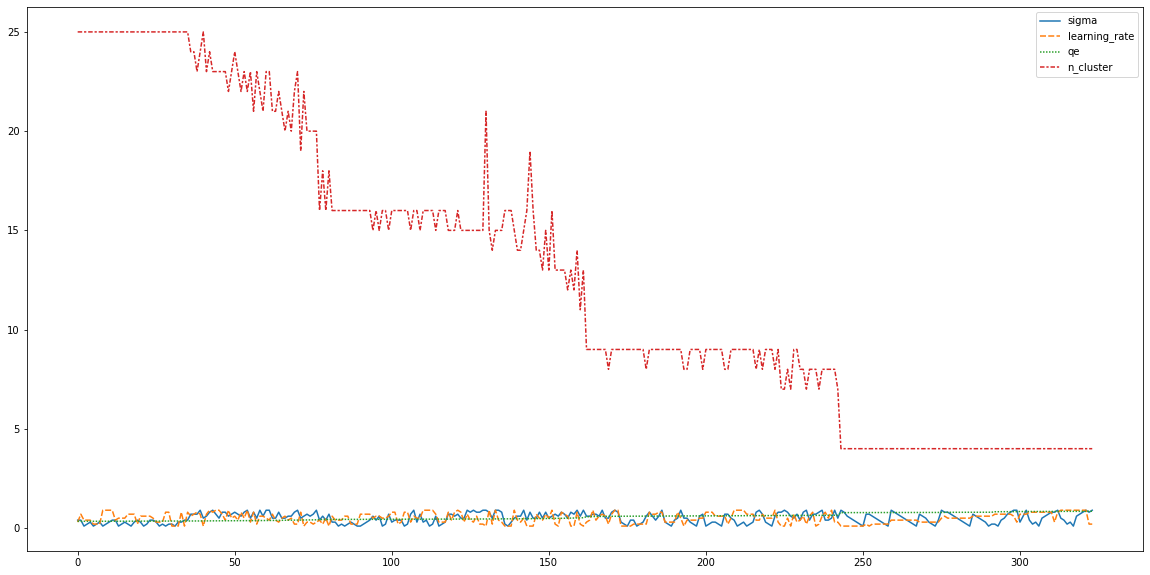


종료시간: 2021-12-08 14:45:45.762366 
총 소요시간: 0 days 00:00:12.149202


In [50]:
s_time = pd.Timestamp.now()
print('시작시간:',s_time,'\n')

#원하는 파라미터 조합 리스트화
map_n= [n for n in range(2,6)]
para_sigma= [np.round(sigma*0.1,2) for sigma in range(1,10)]
para_learning_rate= [np.round(learning_rate*0.1,2) for learning_rate in range(1,10)]

#결과 값을 담을 리스트 res 생성
res = []
#모든 조합에 대해 모델 생성 및 qe,te값 계산
for n in map_n:
    for sigma in para_sigma:
        for lr in para_learning_rate:
            
            try:
                #랜덤으로 초기값을 설정하는 경우
                estimator = MiniSom(n,n,4,sigma =sigma, learning_rate = lr, topology='hexagonal',random_seed=0)
                estimator.random_weights_init(data.values)
                estimator.train(data.values,1000,random_order=True)
                qe = estimator.quantization_error(data.values)
                #te = estimator.topographic_error(data.values)
                winner_coordinates = np.array([estimator.winner(x) for x in data.values]).T
                cluster_index = np.ravel_multi_index(winner_coordinates,(n,n))
                
                res.append([str(n)+'x'+str(n),sigma,lr,'random_init',qe,len(np.unique(cluster_index))])

                # #pca로 초기값을 설정하는 경우
                # estimator = MiniSom(n,n,4,sigma =sigma, learning_rate = lr,topology='hexagonal', random_seed=0)
                # estimator.pca_weights_init(data.values)
                # estimator.train(data.values,1000,random_order=True)
                # qe = estimator.quantization_error(data.values)
                # #te = estimator.topographic_error(data.values)
                # winner_coordinates = np.array([estimator.winner(x) for x in data.values]).T
                # cluster_index = np.ravel_multi_index(winner_coordinates,(n,n))
                
                # res.append([str(n)+'x'+str(n),sigma,lr,'pca_init',qe,len(np.unique(cluster_index))])
                
            except ValueError as e:
                print(e)
            
#결과 데이터프레임 생성 및 sorting 
df_res = pd.DataFrame(res,columns=['map_size','sigma','learning_rate','init_method','qe','n_cluster']) 
df_res.shape
df_res.sort_values(by=['qe'],ascending=True,inplace=True,ignore_index=True)
print(df_res.head(10))

#시각화를 위한 lineplot 생성
plt.figure(figsize=(20,10))
sns.lineplot(data = df_res)
plt.show()

e_time = pd.Timestamp.now()
print('\n종료시간:',e_time,'\n총 소요시간:',e_time-s_time)

In [51]:
for i in range(1, max(df_res['n_cluster'])):
  df = df_res[df_res['n_cluster'] == i]
  df.sort_values(by = 'qe', inplace = True)
  print('n_cluster :', i)
  print(df.head())

n_cluster : 1
Empty DataFrame
Columns: [map_size, sigma, learning_rate, init_method, qe, n_cluster]
Index: []
n_cluster : 2
Empty DataFrame
Columns: [map_size, sigma, learning_rate, init_method, qe, n_cluster]
Index: []
n_cluster : 3
Empty DataFrame
Columns: [map_size, sigma, learning_rate, init_method, qe, n_cluster]
Index: []
n_cluster : 4
    map_size  sigma  learning_rate  init_method        qe  n_cluster
243      2x2    0.9            0.1  random_init  0.778009          4
244      2x2    0.8            0.1  random_init  0.778783          4
245      2x2    0.6            0.1  random_init  0.778965          4
246      2x2    0.5            0.1  random_init  0.779672          4
247      2x2    0.4            0.1  random_init  0.779860          4
n_cluster : 5
Empty DataFrame
Columns: [map_size, sigma, learning_rate, init_method, qe, n_cluster]
Index: []
n_cluster : 6
Empty DataFrame
Columns: [map_size, sigma, learning_rate, init_method, qe, n_cluster]
Index: []
n_cluster : 7
    map_

최종 선택한 파라미터로 최종 모델을 생성한다. 

In [54]:
som_b2 = MiniSom(3,3,4,sigma=0.3,learning_rate=0.2,topology='hexagonal',neighborhood_function='gaussian',activation_distance='euclidean', random_seed=0)
#초기값설정
som_b2.pca_weights_init(data.values)
som_b2.train(data.values,1000,random_order=True)

#평가
som_b2.quantization_error(data.values)
#som_b2.topographic_error(data.values)

winner_coordinates = np.array([som_b2.winner(x) for x in data.values]).T
cluster_index = np.ravel_multi_index(winner_coordinates,(n,n))

SOM visualization에 가장 많이 쓰이는 U-matrix를 그리고, 클러스터 내 데이터 개수를 파악하기 위해 U-matrix위에 scatter plot을 그려준다.

   cluster이름  개수
0          0  49
1          1  20
2          5  27
3          6  19
4          7  12
5         12  23


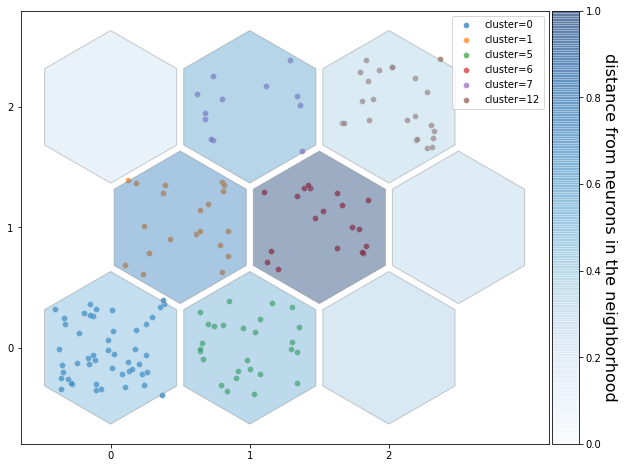

In [56]:
xx, yy = som_b2.get_euclidean_coordinates()
umatrix = som_b2.distance_map()
weights = som_b2.get_weights()

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.set_aspect('equal')

# iteratively add hexagons
# plotting the distance map as background
# 해당 셀과 다른 이웃들 간 거리를 표현, 밝을수록 가깝고, 어두울수록 멀다
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * 2 / np.sqrt(3) * 3 / 4
        hex = RegularPolygon((xx[(i, j)], wy), 
                             numVertices=6, 
                             radius=.95 / np.sqrt(3),
                             facecolor=cm.Blues(umatrix[i, j]), 
                             alpha=.4, 
                             edgecolor='gray')
        plot = ax.add_patch(hex)

#output노드에 해당하는 클러스터 종류 및 밀도 확인         
cnt=[]
for c in np.unique(cluster_index):
        x_= [som_b2.convert_map_to_euclidean(som_b2.winner(x))[0] + (2*np.random.rand(1)[0]-1)*0.4 for x in data.values[cluster_index==c]]
        y_= [som_b2.convert_map_to_euclidean(som_b2.winner(x))[1] + (2*np.random.rand(1)[0]-1)*0.4 for x in data.values[cluster_index==c]]
        y_= [(i* 2 / np.sqrt(3) * 3 / 4) for i in y_]
    
        plot = sns.scatterplot( x = x_,  y= y_ ,label='cluster='+str(c),alpha=.7)
        
        #클러스터에 속한 데이터 개수 데이터프레임으로 출력
        cnt.append([c,len(x_)])

#클러스터별 개수를 표 형태로 출력 
df_cnt = pd.DataFrame(cnt,columns=['cluster이름','개수'])
print(df_cnt)

#x축,y축 간격 설정 
xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plot = plt.xticks(xrange-.5, xrange)
plot = plt.yticks(yrange * 2 / np.sqrt(3) * 3 / 4, yrange)

#차트 우측에 color bar생성
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, 
                            orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
plot = cb1.ax.set_ylabel('distance from neurons in the neighborhood',
                  rotation=270, fontsize=16)
plot = plt.gcf().add_axes(ax_cb)
plt.show()

정육각형 노드의 색이 진할수록 다른 노드와 잘 구분되어 멀리 떨어져 있다는 의미이며, 노드 위의 점 개수가 많을수록 클러스터에 많은 데이터가 포함되어 있는 것이다. 위 그림에서는 1번 클러스터와 4번 클러스터가 다른 클러스터와 잘 구분되어 있음을 알 수 있다. 

 

이외에도 2개의 설명변수 쌍을 각각 x축, y축으로 두고 scatter plot을 그려서 각 설명변수가 클러스터에 미치는 영향 (클러스터의 특성)을 파악해볼 수도 있다. 